### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных - жертв, а $y(t)$ - количество животных-хищников. Коэффициенты a, b, c и d описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются хищные животные, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

Text(0, 0.5, 'Количество хищников')

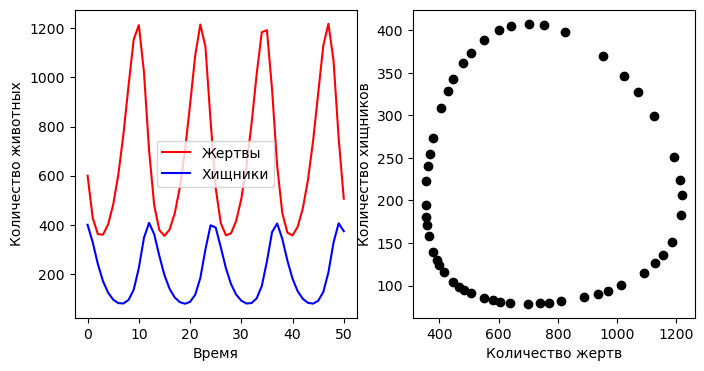

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
# сетка
t = np.linspace(0, 50, 51)
# решение пакетным методом
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")


Слева - график зависимости популяции от времени, справа - фазовое пространство.

Задание: 

Сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

В данной задаче решение есть периодическая функция, поэтому адекватным ограничением величины шага снизу можно считать $T \approx 12$, то есть количество узлов $N > 5$ для диапазона сетки от 0 до 50.$\newline$
Также, если отбросить зависимость хищник-жертва (коэф $b, c << a, b$), то решенем уравнения для $x$ будет функция $e^{at}$, тогда было бы логично потребовать, чтобы за шаг сетки значение функции изменялось не больше, чем в $e$ раз. В таком случае возникает ограниение $h < \frac{1}{a} $ что для нашего диапазона эквивалентно неравенству $N>50a = 20$. Проводя аналогичные рассуждения для $y$, получим $N>50b = 35$

### Часть 2. Метод высокого порядка

Задание: 
1. выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и четвертого порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)
2. решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

**Метод Рунге-Кутты первого порядка (для простоты возьмём метод Эйлера)**

Text(0, 0.5, 'Количество хищников')

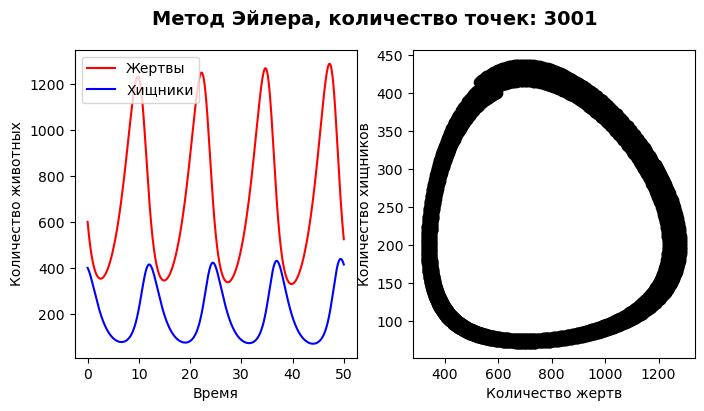

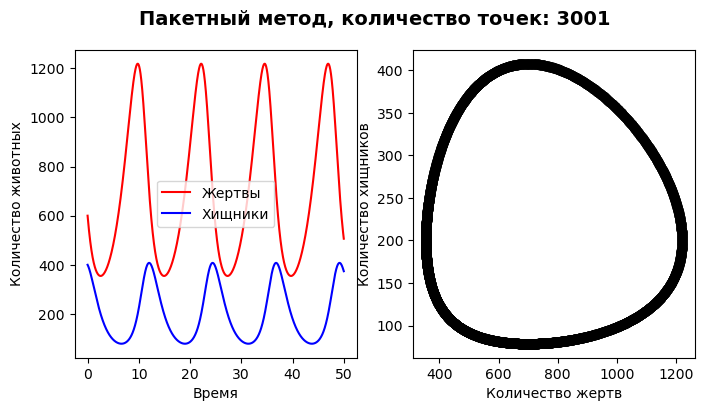

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
left = 0
right = 50
N = 3001
h = (right - left)/(N-1)
xy_t = np.array([xy_vec0])

# сетка
t = np.linspace(left, right, N)

# решение пакетным методом
xy_t_packet = integrate.odeint(f, xy_vec0, t)

# решение методом Эйлера
for i in range (0, N-1):
    k1 = np.array(f(xy_t[i], t[i]))
    xy = xy_t[i] + h * k1
    xy = np.array([xy])
    xy_t = np.append(xy_t, xy, axis=0)

# вывод для метода Эйлера
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(f'Метод Эйлера, количество точек: {N}', fontsize=14, fontweight='bold')
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

# вывод для пакетного метода
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(f'Пакетный метод, количество точек: {N}', fontsize=14, fontweight='bold')
axes[0].plot(t, xy_t_packet[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t_packet[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t_packet[:,0], xy_t_packet[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

Видно, что сходимость данного метода не лучшая, так как только на большом количестве точек он даёт решение, близкое к истинному

**Метод Рунге-Кутты четвёртого порядка**

Text(0, 0.5, 'Количество хищников')

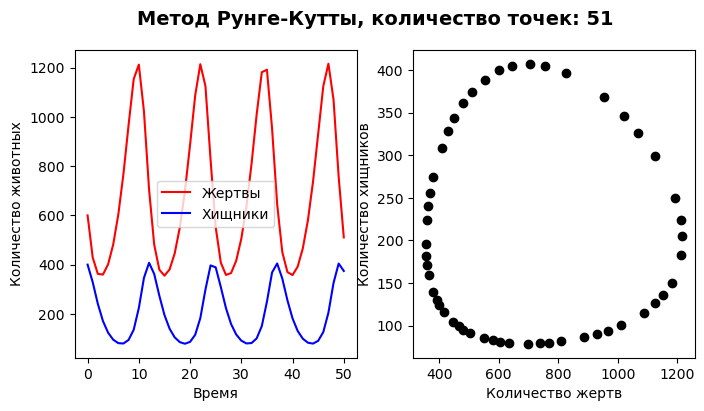

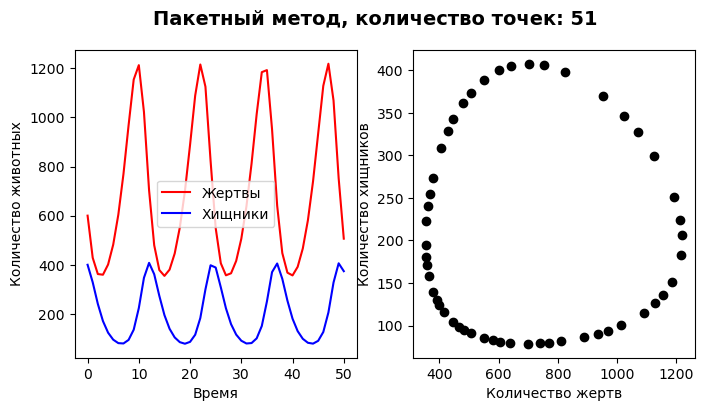

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
left = 0
right = 50
N = 51
h = (right - left)/(N-1)
xy_t = np.array([xy_vec0])

# сетка
t = np.linspace(left, right, N)

# решение пакетным методом
xy_t_packet = integrate.odeint(f, xy_vec0, t)

# решение методом РК4
for i in range (0, N-1):
    k1 = np.array(f(xy_t[i] , t[i]))
    k2 = np.array(f(xy_t[i] + (h*k1)/2, t[i] + h/2))
    k3 = np.array(f(xy_t[i] + (h*k2)/2, t[i] + h/2))
    k4 = np.array(f(xy_t[i] + (h*k3), t[i] + h))
    xy = xy_t[i] + h * (k1 + 2*k2 + 2*k3 + k4)/6
    xy = np.array([xy])
    xy_t = np.append(xy_t, xy, axis=0)

# вывод для метода РК4
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(f'Метод Рунге-Кутты, количество точек: {N}', fontsize=14, fontweight='bold')
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

# вывод для пакетного метода
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(f'Пакетный метод, количество точек: {N}', fontsize=14, fontweight='bold')
axes[0].plot(t, xy_t_packet[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t_packet[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t_packet[:,0], xy_t_packet[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

Для реализации своего метода Рунге-Кутты четвёртого порядка я выбрал коэффициенты из картинки ниже, которая была взята из одной из статей на тему численного решения ОДУ: 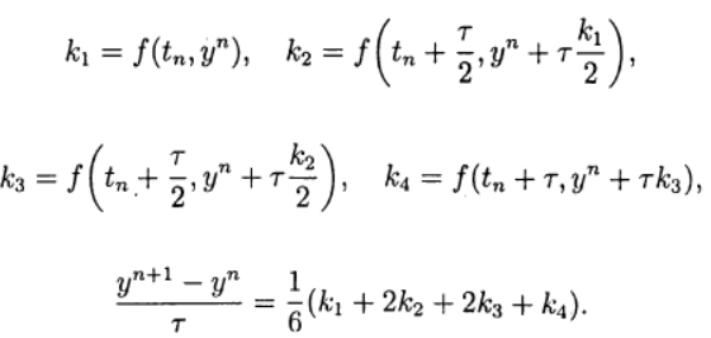Видно, что данный метод Рунге-Кутты (практически) совпадает с пакетным методом. Не исключено, что именно такая реализация стоит за пакетным методом, ведь в статье этот метод Рунге-Кутты заявлен как наиболее распространённый. 
Также очевидна разница между методом первого порядка и четвёртого - даже на небольшом количестве точек последний сходится к решению задачи, что нельзя сказать для метода Эйлера. 

### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке. Исследование порядка можно проводить на модельной задаче (не из постановки в задании).

Исследование проведём для задачи вида 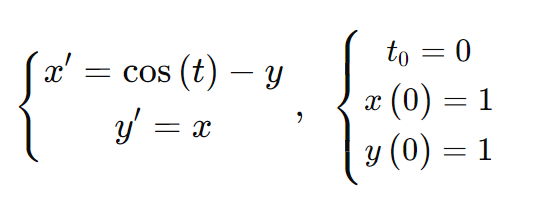 для которой имеется известное решение 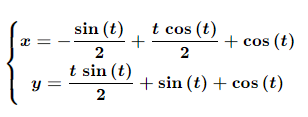

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144]


(0.0, 5.0)

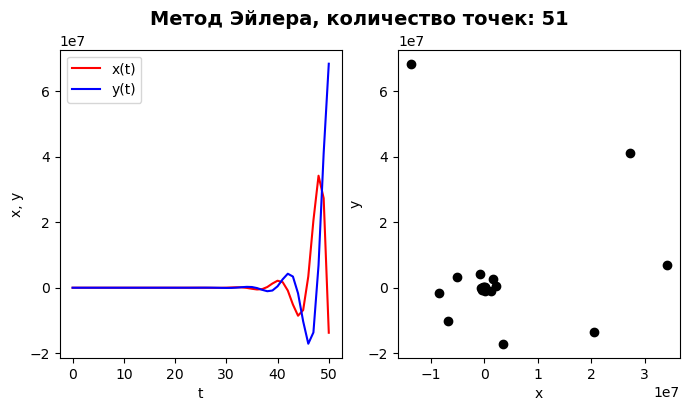

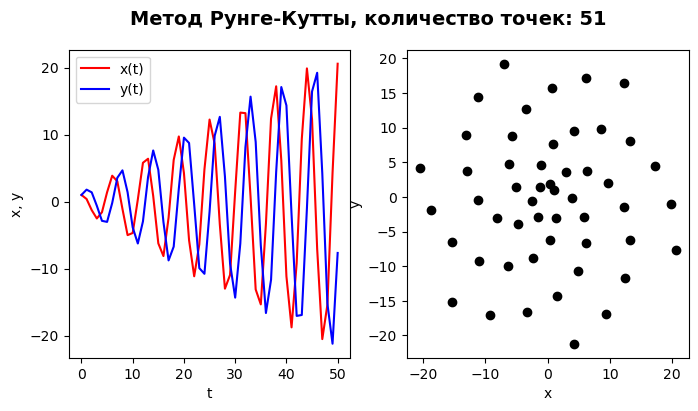

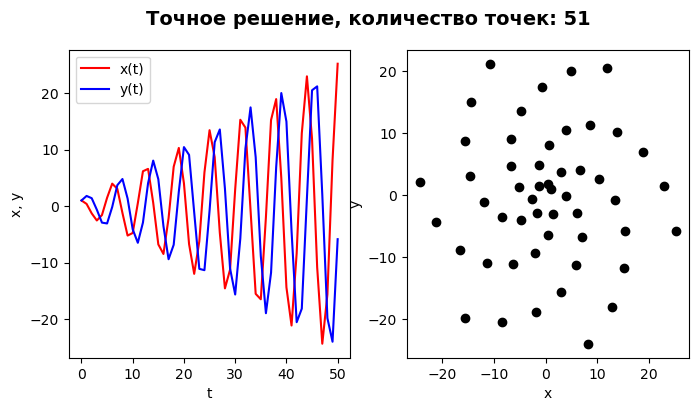

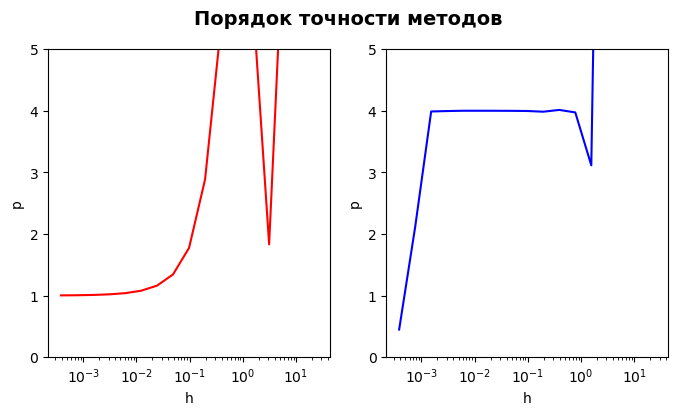

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def decision(t):
    return np.array([-np.sin(t)/2 + (t/2 + 1)*np.cos(t), (t/2 + 1)*np.sin(t) + np.cos(t)])

def f(xy_vec, t):
    x, y = xy_vec
    return [np.cos(t) - y, x]

def Euler_method(left, right, N, xy_t, t):
    h = (right - left)/(N-1)
    for i in range (0, N-1):
        k1 = np.array(f(xy_t[i], t[i]))
        xy = xy_t[i] + h * k1
        xy = np.array([xy])
        xy_t = np.append(xy_t, xy, axis=0)
    return xy_t
    
def RK4_method(left, right, N, xy_t, t):
    h = (right - left)/(N-1)
    for i in range (0, N-1):
        k1 = np.array(f(xy_t[i] , t[i]))
        k2 = np.array(f(xy_t[i] + (h*k1)/2, t[i] + h/2))
        k3 = np.array(f(xy_t[i] + (h*k2)/2, t[i] + h/2))
        k4 = np.array(f(xy_t[i] + (h*k3), t[i] + h))
        xy = xy_t[i] + h * (k1 + 2*k2 + 2*k3 + k4)/6
        xy = np.array([xy])
        xy_t = np.append(xy_t, xy, axis=0)
    return xy_t

# начальные условия
xy_vec0 = [1, 1]
left = 0
right = 50
N = [2**i for i in range(1, 19)]
print(N)
xy_t = np.array([xy_vec0])
epsilon_Euler = []
epsilon_RK4 = []
p_Euler = []
p_RK4 = []


for i in range(len(N)):
    h = (right - left)/(N[i]-1)
    t = np.linspace(left, right, N[i])
    xy_t_Euler = Euler_method(left, right, N[i], xy_t, t)
    xy_t_RK4 = RK4_method(left, right, N[i], xy_t, t)
    xy_truth = decision(t)
    epsilon_Euler.append(np.linalg.norm(xy_t_Euler[:,0] - xy_truth[0], np.inf) + np.linalg.norm(xy_t_Euler[:,1] - xy_truth[1], np.inf))
    epsilon_RK4.append(np.linalg.norm(xy_t_RK4[:,0] - xy_truth[0], np.inf) + np.linalg.norm(xy_t_RK4[:,1] - xy_truth[1], np.inf))
    
for i in range(0, len(N)-1):
    p_Euler.append( abs(np.log2(epsilon_Euler[i]/epsilon_Euler[i+1])) )
    p_RK4.append( abs(np.log2(epsilon_RK4[i]/epsilon_RK4[i+1])) )
    
h = ((right - left)/np.array(N))
#print(h)
#print(epsilon_Euler)
#print(epsilon_RK4)

t = np.linspace(left, right, 51)
xy_t_Euler = Euler_method(left, right, 51, xy_t, t)
xy_t_RK4 = RK4_method(left, right, 51, xy_t, t)
xy_truth = decision(t)

# вывод для метода Эйлера
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle(f'Метод Эйлера, количество точек: 51', fontsize=14, fontweight='bold')
axes[0].plot(t, xy_t_Euler[:,0], 'r', label="x(t)")
axes[0].plot(t, xy_t_Euler[:,1], 'b', label="y(t)")
axes[0].set_xlabel("t")
axes[0].set_ylabel("x, y")
axes[0].legend()
axes[1].plot(xy_t_Euler[:,0], xy_t_Euler[:,1], 'ko')
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

# вывод для метода РК4
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Метод Рунге-Кутты, количество точек: 51', fontsize=14, fontweight='bold')
axes[0].plot(t, xy_t_RK4[:,0], 'r', label="x(t)")
axes[0].plot(t, xy_t_RK4[:,1], 'b', label="y(t)")
axes[0].set_xlabel("t")
axes[0].set_ylabel("x, y")
axes[0].legend()
axes[1].plot(xy_t_RK4[:,0], xy_t_RK4[:,1], 'ko')
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

# вывод точного решения
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Точное решение, количество точек: 51', fontsize=14, fontweight='bold')
axes[0].plot(t, xy_truth[0], 'r', label="x(t)")
axes[0].plot(t, xy_truth[1], 'b', label="y(t)")
axes[0].set_xlabel("t")
axes[0].set_ylabel("x, y")
axes[0].legend()
axes[1].plot(xy_truth[0], xy_truth[1], 'ko')
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

#вывод порядка точности методов
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Порядок точности методов', fontsize=14, fontweight='bold')
axes[0].plot(h[:-1], np.array(p_Euler), 'r', label="Эйлера")
axes[0].set_xlabel("h")
axes[0].set_ylabel("p")
axes[0].set_xscale("log")
axes[0].set_ylim(0, 5)
axes[1].plot(h[:-1], np.array(p_RK4), 'b', label="Рунге-Кутты")
axes[1].set_xlabel("h")
axes[1].set_ylabel("p")
axes[1].set_xscale("log")
axes[1].set_ylim(0, 5)

По определению порядка точности метода $p$ - показатель степени $h$ в неравестве: $\varepsilon(h) = \parallel y - u^{h} \parallel \leq Ch^p$, тогда рассчитав эту норму для нашего шага и шага вдвое меньше, и положив $C_1 = C_2$, получим уже известную формулу $p = \log(\frac{\varepsilon(h)}{\varepsilon(h/2)})$

На обоих графиках мы наблюдаем подтверждение теории - для метода Эйлера (левый нижний график) порядок первый, для Рунге-Кутты четвёртого порядка (правый нижний график) - четвёртый. Рассуждения про участки графика аналогичны рассуждениям из задачи про численное дифференцирование - справа участок, на котором предположение $C_1 \approx C_2$ не выполняется, поэтому ошибка метода велика на нём, а слева становится существенной ошибка округления